In [1]:
# Version: 0.0.1
# Date:    2022-07-22
# Author:  P. J. Vetter, Timo Joas
# Email=  philipp.vetter@uni-ulm.de;

In [1]:
# Simulation to investigate the robustness of the optimal control pulse. 
# Pulse units are abstracted away by imported ArbPulse class

# The oc_element function reads in the pulse files and creates the corresponding pulse

# all possible initial states are defined in the 'Initial State' section
# density matrix of the m_s = 0 state: rho_ms0 
# density matrix of the m_s = -1 state: rho_msm1
# density matrix of the x state: rho_x
# density matrix of the y state: rho_y

# (The first run might take a bit longer due to the plot generation)

# Packages

In [1]:
#%matplotlib notebook
#%matplotlib notebook

import qutip
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
from scipy import interpolate
import matplotlib as mpl

from oc_simlib import TimeDependentSimulation, SimParameters, ArbPulse


# for plots
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})
plt.rcParams.update({'font.size': 40})  

# Library

# Variables

In [2]:
# magnetic field [G]
B = 90

## Load pulses

In [3]:



folder = r"C:\Users\Timo\OneDrive\_Promotion\Software\Simulations\202207_OC_Pulses_Philipp\oc_pulse_analysis\input_pulses\rect"
name = "rec_amp_20MHz_0.025mus_"
pulse = ArbPulse.load_pulse(folder, name)

folder = r"C:\Users\Timo\OneDrive\_Promotion\Software\Simulations\202207_OC_Pulses_Philipp\oc_pulse_analysis\input_pulses"
name = "on_nv=2_"

folder = r"C:\Users\Timo\OneDrive\_Promotion\Software\Simulations\202207_OC_Pulses_Philipp\oc_pulse_analysis\input_pulses\20220727_1_guessFromReisserMsc"
name = "opt_res_"
#pulse = TimeDependentSimulation.load_pulse(folder, name, func_volt_2_rabi=lambda x: x/0.25*20, func_t_2_us=lambda t: t*1e6)


#folder = r"C:\Users\Timo\OneDrive\_Promotion\Software\Simulations\202207_OC_Pulses_Philipp\oc_pulse_analysis\input_pulses\Reisser_MSc_pulse_1"
#name = "Opt_Pulse_01_"
#pulse = TimeDependentSimulation.load_pulse(folder, name, func_t_2_us=lambda t: t*1e-9*1e6)

# loading experimental pulse
# 0.25 = 20 MHz
pulse = ArbPulse.load_pulse(folder, name, unit_t='s',  func_p_v_2_omega_mhz=lambda x: x/0.25*20)


#pulse = TimeDependentSimulation.load_pulse(folder, name, func_t_2_us=lambda t: t*1e6)
#
pulse.as_dict()




{'name': 'opt_res_',
 'folder': 'C:\\Users\\Timo\\OneDrive\\_Promotion\\Software\\Simulations\\202207_OC_Pulses_Philipp\\oc_pulse_analysis\\input_pulses\\20220727_1_guessFromReisserMsc',
 'file': ['C:\\Users\\Timo\\OneDrive\\_Promotion\\Software\\Simulations\\202207_OC_Pulses_Philipp\\oc_pulse_analysis\\input_pulses\\20220727_1_guessFromReisserMsc\\opt_res_amplitude.txt',
  'C:\\Users\\Timo\\OneDrive\\_Promotion\\Software\\Simulations\\202207_OC_Pulses_Philipp\\oc_pulse_analysis\\input_pulses\\20220727_1_guessFromReisserMsc\\opt_res_phase.txt'],
 'timegrid_unit': 's',
 'data_unit': 'V',
 'data_ampl': array([0.07465155, 0.07423673, 0.07383209, ..., 0.01484045, 0.01462635,
        0.01441627]),
 'data_phase': array([0.03370918, 0.03357784, 0.03344248, ..., 0.02345864, 0.02366466,
        0.02386448]),
 'timegrid_ampl': array([0.00000000e+00, 5.00250125e-11, 1.00050025e-10, ...,
        9.98999500e-08, 9.99499750e-08, 1.00000000e-07]),
 'timegrid_phase': array([0.00000000e+00, 5.00250125e

In [21]:
pulse.timegrid

array([0.00000000e+00, 5.00250125e-11, 1.00050025e-10, ...,
       9.98999500e-08, 9.99499750e-08, 1.00000000e-07])

In [28]:
pulse.data_ampl, pulse.data_unit

(array([2.69673467, 2.68622716, 2.67539817, ..., 1.87669105, 1.89317251,
        1.90915821]),
 'MHz')

In [29]:
pulse.as_dict()

{'name': 'opt_res_',
 'folder': 'C:\\Users\\Timo\\OneDrive\\_Promotion\\Software\\Simulations\\202207_OC_Pulses_Philipp\\oc_pulse_analysis\\input_pulses\\20220727_1_guessFromReisserMsc',
 'file': ['C:\\Users\\Timo\\OneDrive\\_Promotion\\Software\\Simulations\\202207_OC_Pulses_Philipp\\oc_pulse_analysis\\input_pulses\\20220727_1_guessFromReisserMsc\\opt_res_amplitude.txt',
  'C:\\Users\\Timo\\OneDrive\\_Promotion\\Software\\Simulations\\202207_OC_Pulses_Philipp\\oc_pulse_analysis\\input_pulses\\20220727_1_guessFromReisserMsc\\opt_res_phase.txt'],
 'timegrid_unit': 's',
 'data_unit': 'MHz',
 'data_ampl': array([2.69673467, 2.68622716, 2.67539817, ..., 1.87669105, 1.89317251,
        1.90915821]),
 'data_phase': array([0.03370918, 0.03357784, 0.03344248, ..., 0.02345864, 0.02366466,
        0.02386448]),
 'timegrid_ampl': array([0.00000000e+00, 5.00250125e-11, 1.00050025e-10, ...,
        9.98999500e-08, 9.99499750e-08, 1.00000000e-07]),
 'timegrid_phase': array([0.00000000e+00, 5.0025012

In [7]:
len(pulse.as_dict()['timegrid_ampl'])

2000

# Generate pulses

In [4]:
timegrid = np.linspace(1,2e-6, 10)
np.argmin(np.abs(timegrid-1e-6))

9

In [4]:
def generate_levitt(omega, phase=0, n_t=1000):
    """
    Generate a levitt pulse as a optimal control pulse file.
    Assumes that quadratues I*sin(f_mw*t) + Q*cos(f_mw*t) are used in sampling.
    """

    def get_iq(phase):
        if phi==0 or phi==2*np.pi:
            return 1,0
        elif phi==np.pi/2:
            return 0,1
        elif phi==np.pi:
            return -1,0
        elif phi==3*np.pi/2:
            return 0,-1
        else:
            raise ValueError
    def get_t_pix(omega, pix=1):
        return 0.5*pix/omega

    omega_mhz = omega*1e-6
    tpi_us = get_t_pix(omega_mhz, pix=1)  

    # rabi in MHz, times in us
    timegrid_us = np.linspace(0, 2*tpi_us, n_t) # total pulse area 2pi
    data_ampl = np.zeros((len(timegrid_us)))   # I quadrature
    data_phase = np.zeros((len(timegrid_us)))  # Q

    phases = np.asarray([np.pi/2, 0, np.pi/2]) + phase
    tpulse_by_pi = [0.5, 1, 0.5]

    #phases = [np.pi/2]
    #tpulse_by_pi = [0.5]

    t_curr_us = 0
    for i_comppulse, phi in enumerate(phases):
        pix = tpulse_by_pi[i_comppulse]
        t_end_us = t_curr_us + get_t_pix(omega_mhz, pix=pix)
        idx_start = np.argmin(np.abs(timegrid_us-t_curr_us))
        idx_end = np.argmin(np.abs(timegrid_us-t_end_us))

        val_iq = np.asarray(get_iq(phi))*omega_mhz
        data_ampl[idx_start:idx_end+1] = val_iq[0]
        data_phase[idx_start:idx_end+1] = val_iq[1]

        if t_curr_us == timegrid_us[-1]:
            break
        t_curr_us = t_end_us

    idx_end = np.argmin(np.abs(timegrid_us-t_end_us))

    assert idx_end == n_t -1
    
    pulse = ArbPulse()
    pulse.name = f'levitt_phi={phase/np.pi:.1f}pi'
    pulse.timegrid_unit = 'µs'
    pulse.data_unit = 'MHz'
    
    pulse._data_ampl = data_ampl
    pulse._data_phase = data_phase
    pulse._timegrid_ampl = timegrid_us
    pulse._timegrid_phase = timegrid_us

    return pulse

def generate_rect_pi(omega, phase=0, n_t=1000):
    """
    Generate a levitt pulse as a optimal control pulse file.
    Assumes that quadratues I*sin(f_mw*t) + Q*cos(f_mw*t) are used in sampling.
    """

    omega_mhz = omega*1e-6
    tpi_us = get_t_pix(omega_mhz, pix=1)  

    # rabi in MHz, times in us
    timegrid_us = np.linspace(0, tpi_us, n_t) 
    data_ampl = np.zeros((len(timegrid_us)))   # I quadrature
    data_phase = np.zeros((len(timegrid_us)))  # Q

    phases = np.asarray([0]) + phase
    tpulse_by_pi = [1]

    #phases = [np.pi/2]
    #tpulse_by_pi = [0.5]

    t_curr_us = 0
    for i_comppulse, phi in enumerate(phases):
        pix = tpulse_by_pi[i_comppulse]
        t_end_us = t_curr_us + get_t_pix(omega_mhz, pix=pix)
        idx_start = np.argmin(np.abs(timegrid_us-t_curr_us))
        idx_end = np.argmin(np.abs(timegrid_us-t_end_us))

        val_iq = np.asarray(get_iq(phi))*omega_mhz
        data_ampl[idx_start:idx_end+1] = val_iq[0]
        data_phase[idx_start:idx_end+1] = val_iq[1]

        if t_curr_us == timegrid_us[-1]:
            break
        t_curr_us = t_end_us

    idx_end = np.argmin(np.abs(timegrid_us-t_end_us))

    assert idx_end == n_t -1
    
    pulse = ArbPulse()
    pulse.name = 'rect_phi={phase/np.pi:.1f}pi'

    pulse.timegrid_unit = 'µs'
    pulse.data_unit = 'MHz'
    
    pulse._data_ampl = data_ampl
    pulse._data_phase = data_phase
    pulse._timegrid_ampl = timegrid_us
    pulse._timegrid_phase = timegrid_us

    return pulse
    
pulse = generate_levitt(20e6, phase=0)
#pulse = generate_rect_pi(20e6, phase=0)

#pulse['data_phase']
#val_i, val_q = np.asarray([1,0])*1
#np.asarray([np.pi/2, 0, np.pi/2]) + 0

#data_ampl = np.asarray([0,0,0])
#data_ampl[0:3] = 1
#data_ampl

## Plot pulses

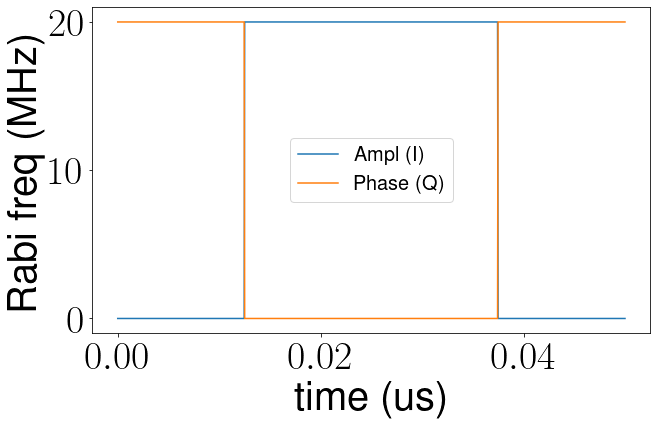

In [6]:
import matplotlib.pyplot as plt
    
t_amplitude = pulse.timegrid
amplitude = pulse.get_data_ampl(unit='MHz')
t_phase = pulse.timegrid
phase = pulse.get_data_phase(unit='MHz')

try:
    plt.figure(figsize=(10,6))
    plt.plot(t_amplitude, amplitude, label="Ampl (I)")
    plt.plot(t_phase, phase, label="Phase (Q)")
   # plt.plot(t_phase, phase+amplitude, label="I+Q")
    plt.ylabel("Rabi freq (MHz)")
    plt.xlabel("time (us)")
    plt.legend(loc='best', prop={'size': 20})
    plt.show()
except:
    logger.exception("")

# Parameters, Operators

In [6]:

simp = SimParameters()
simp.gamma_nv

2.8

# Measurements

## Frequency Detuning

In [7]:

B = 86.07
df = 50 # MHz
n_f = np.min([int(df/0.25), 500])
f_mw = simp.gamma_nv * B
f_block = 2710 # MHz
df_block = 10

sim = TimeDependentSimulation()

freq_array = np.linspace(simp.D - simp.gamma_nv * B - df, simp.D - simp.gamma_nv * B + df, n_f)
#freq_array = np.linspace(2710-10, 2710+10, 50)
data_freq_detuning = sim.run_sim_fsweep(freq_array, pulse, B, simp)

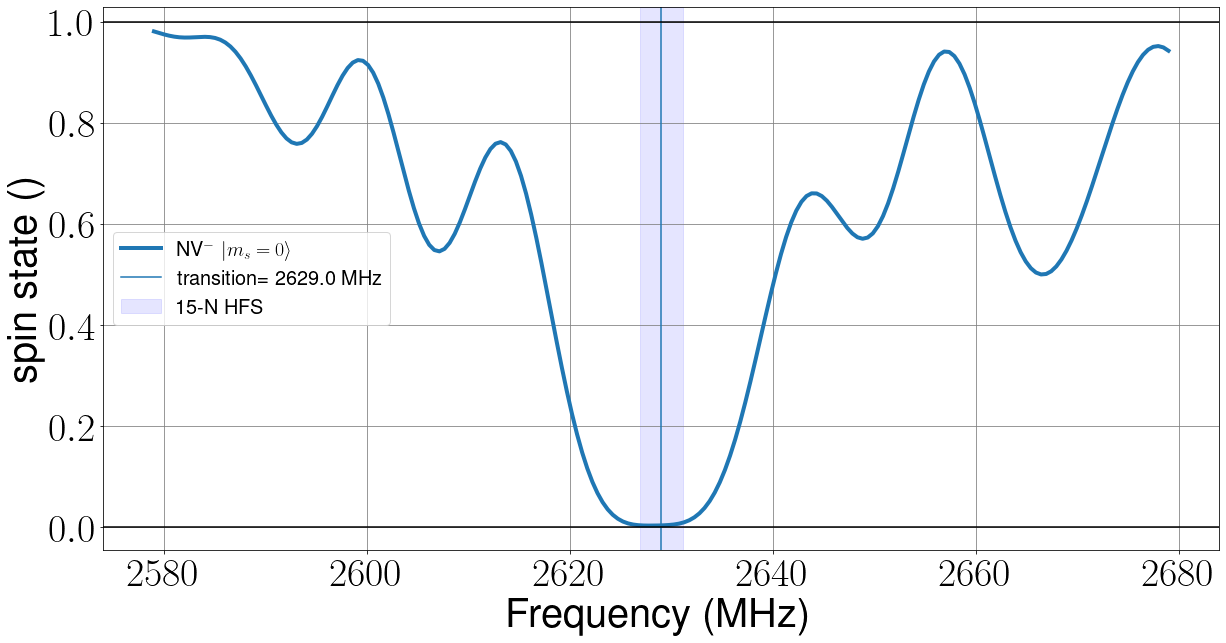

In [8]:
f_mw = simp.D - simp.gamma_nv * B

# visualize the results
fig1, ax = plt.subplots(figsize=(20,10))
ax.plot(freq_array, data_freq_detuning, lw=4, label=r'NV${}^{-}~|m_s=0\rangle$')

ax.axvline(f_mw, label=f"transition= {f_mw:.1f} MHz")
ax.axvspan(f_mw-2.1, f_mw+2.1, alpha=0.1, color='blue', label='15-N HFS')


# blockband
if f_mw + df >= f_block: 
    ax.axvline(f_block, label=f"NV1 blockband (2710 +- {df_block} MHz)", color='red')
    ax.axvspan(f_block-df_block, f_block+df_block, alpha=0.1, color='red')
# grid
ax.axhline(0, color='black')
ax.axhline(1, color='black')
plt.grid(axis='x', color='0.5')
plt.grid(axis='y', color='0.5')



ax.set_xlabel(r'Frequency (MHz)')
ax.set_ylabel(r'Spin state ()')
ax.legend(loc='best', prop={'size': 20})
plt.show(fig1)

## Amplitude Error

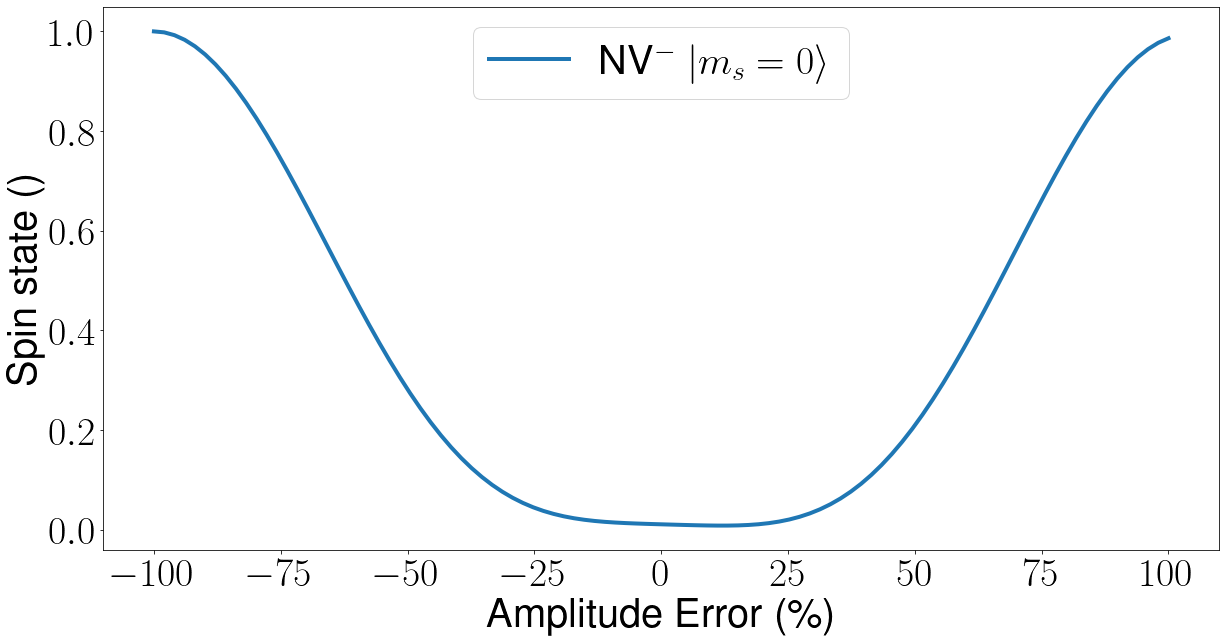

In [10]:
B= 90 #gauss

sim = TimeDependentSimulation()

# scanned amplitude steps
amp_array = np.linspace(-1, 1, 100)
data_amp_detuning = sim.run_sim_ampsweep(amp_array, pulse, B, simp)

# visualize the results
fig2, ax = plt.subplots(figsize=(20,10))
ax.plot(amp_array*100, data_amp_detuning, lw=4, label=r'NV${}^{-}~|m_s=0\rangle$')
ax.set_xlabel(r'Amplitude Error (\%)')
ax.set_ylabel(r'Spin state ()')
ax.legend(loc='best')
plt.show(fig2) 